In [2]:
import argparse
import random
import glob
import os
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt


# from hlathena.trainer import run_training
import hlathena as ht
# from hlathena.training_evaluation import TrainingEvaluation

In [3]:
root='C:/git/hlathenav2/hlathena/'

### Test run settings for trainer .py
hits = root + './data/A0202_dedup_hits_mu.txt'
decoys = root + './data/model_training/data/dedup_decoys_mu.txt'

hits = root + './data/model_training/hits_95.txt'
decoys =  root + './data/model_training/decoys.txt'

aa_feature_folder =  root + './data/model_training/data/featurestest'
feat_sets =  root + './data/model_training/data/basic_features.txt'

outdir =  root + '../notebooks/test'

allele = 'A0202'
pep_col = 'seq'
run_name = 'test'

seeds = None
folds = 5
learning_rate = 0.01
dropout_rate = 0.1
epochs = 10
batch_size = 512
pred_replicates = 100
decoy_mul = 1
reps = 2




In [4]:
hits = pd.read_csv(hits, sep=' ')
hits.head()

,allele,len,seq
0,A0101,8,ADMGHLKY
1,A0101,8,ELDDTLKY
2,A0101,8,FSDNIEFY
3,A0101,8,FTELAILY
4,A0101,8,GLDEPLLK


In [5]:
hits['target']=1

In [9]:
peps = ht.PeptideDataset(hits, 
                         pep_col_name = 'seq',
                         allele_col_name = 'allele',
                         target_col_name='target') #, 
                         #feat_cols=['up_freq','dn_freq'])

In [14]:
peps.get_aa_encoded_peptide_map()

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,up_freq,dn_freq
AAADIVNFL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.366717,0.329989
ADASLLKKV,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.418755,0.151914
AENEFVTIK,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.429548,0.419665
AFADIIHSL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.438190,0.097562
AIADHYMQV,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.405886,0.370890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YVKDRVEKV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.370180,0.400655
YVSEILEKV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.397961,0.315609
YVSKYINYI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.398466,0.408535
YVVPFVAKV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.367456,0.383148


In [16]:
encoded = peps._encode_peptides()

In [22]:
len(encoded)

2301

In [25]:
encoded[0][:-2].reshape(peps.peptide_length, peps.aa_feature_map.feature_count)


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

In [20]:
len(encoded[:-2])

2299

reps: 2, seeds: None
Number of hits: 2301
Number of decoys: 495312

Training rep 1 of 2 reps...
SEED: 80

Training feature set P of ['P', 'PE']...

Training fold 1 of 5...
Train IDs for fold 1 of feat set []: [   1    3    5 ... 4599 4600 4601]
Training fold 2 of 5...
Train IDs for fold 2 of feat set []: [   0    2    3 ... 4598 4599 4601]
Training fold 3 of 5...
Train IDs for fold 3 of feat set []: [   0    1    2 ... 4599 4600 4601]
Training fold 4 of 5...
Train IDs for fold 4 of feat set []: [   0    1    2 ... 4598 4599 4600]
Training fold 5 of 5...
Train IDs for fold 5 of feat set []: [   0    1    2 ... 4598 4600 4601]

Training and evaluation finished for P.
                  AUC: 0.9919248856523843
                  PPV: 0.44893524554541503
                  PRAUC: 0.39694956956080707
             
Training feature set PE of ['P', 'PE']...


Peptide set features: ['logTPMab']
          logTPMab
count  4602.000000
mean      2.675355
std       2.030691
min       0.000000
25%     

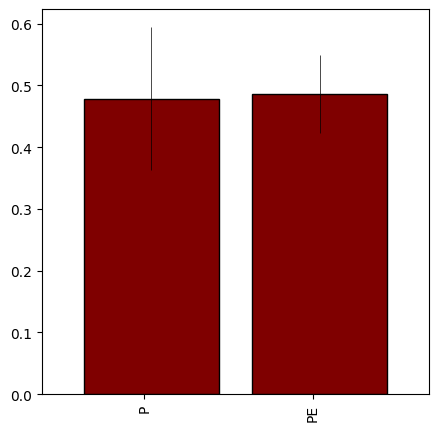

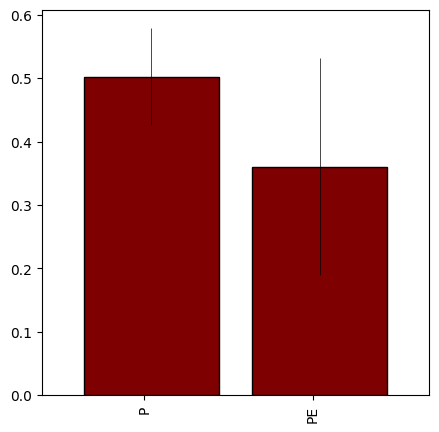

In [3]:
run_training(hits = hits, 
             decoys = decoys, 
             allele = allele, 
             pep_col = pep_col, 
             folds = folds, 
             epochs = epochs, 
             learning_rate = learning_rate, 
             dropout_rate = dropout_rate, 
             batch_size = batch_size, 
             pred_replicates = 
             pred_replicates, 
             decoy_mul = decoy_mul, 
             aa_feature_folder = aa_feature_folder, 
             feature_columns = None, 
             feature_sets = feat_sets, 
             reps = reps, 
             rep_seeds = seeds, 
             outdir = outdir, 
             run = run_name)






In [5]:
print(f'we are using {str(allele)}')

we are using A0202


In [ ]:
print('we are using {a}'.format(a=allele)

In [4]:
pep_feature_cols = [] #if feat_cols is None else feat_cols.split(";")
pep_feature_sets_dict = {str(pep_feature_cols): [col for col in pep_feature_cols]} if not feat_sets \
                                                                                   else parse_feature_sets(feat_sets)
# override peptide column input if feature set dict is provided
pep_feature_cols = list({x for f in list(pep_feature_sets_dict.values()) if f for x in f}) if feat_sets \
                                                                                     else pep_feature_cols                                                                       
pep_feature_cols = [pep_col] + pep_feature_cols
print(f'reps: {reps}, seeds: {seeds}')
seeds = None if seeds is None or len(seeds.split(','))!=reps else seeds.split(',') 

reps: 2, seeds: None


In [5]:
# retrieve list of amino acid feature files
aa_feature_files = get_aa_feature_files_from_dir(aa_feature_folder)

# get hits and decoys' dataframes
hits_df = pd.read_table(hits, sep=" ", usecols=pep_feature_cols)

N = int(hits_df.shape[0]*decoy_mul) # get number of decoys to include based on decoy_mul
decoys_df = pd.read_table(decoys, sep=" ", usecols=pep_feature_cols)

In [6]:
resample_hits = False
if (resample_hits):
    hits_df = hits_df.sample(N, replace=True)
        
print("Number of hits: %d" % len(hits_df))
print("Number of decoys: %d" % len(decoys_df))

# label pep column 'seq'
default_pep_col = 'seq'
hits_df.rename(columns={pep_col: default_pep_col}, inplace=True)
decoys_df.rename(columns={pep_col: default_pep_col}, inplace=True)


# check that both pep files have the same feature columns, if any
assert(all(hits_df.columns.sort_values() == decoys_df.columns.sort_values()))
    
# check that all peptide level feature columns are numeric
assert(all([np.issubdtype(hits_df[c], np.number) for c in hits_df.columns if c!=default_pep_col]))
assert(all([np.issubdtype(decoys_df[c], np.number) for c in decoys_df.columns if c!=default_pep_col]))
    
decoys_resampled = decoys_df.sample(N, random_state=1)

rep_metrics = []

Number of hits: 2301
Number of decoys: 495312


In [7]:
hits_df['target']=1
decoys_resampled['target']=0
peps_df = pd.concat([hits_df,decoys_resampled])

In [8]:
peps_df.head()

,seq,logTPMab,target
0,AAADIVNFL,1.8156,1
1,ADASLLKKV,3.6882,1
2,AENEFVTIK,0.0000,1
3,AFADIIHSL,4.1863,1
4,AIADHYMQV,6.0865,1


In [9]:
for rep in range(1,reps+1):
    print("\nTraining rep {} of {} reps...".format(rep,reps))

    # decoys_resampled = decoys_df.sample(N, random_state=1)

    rep_outdir = ''.join([outdir,'/rep',str(rep)])
    seed = random.randrange(0,100) if seeds is None else int(seeds[rep-1])
    print(f"SEED: {seed}\n")
        
    # metrics = trainer(hits_df, decoys_resampled, allele, folds, epochs, learning_rate, dropout_rate, batch_size, pred_replicates, decoy_mul, aa_feature_files, rep_outdir, pep_feature_sets_dict, run_name, seed)
    metrics = trainer(pep_df = peps_df, 
                      label_col = 'target',
                      allele = allele, 
                      folds = folds, 
                      epochs = epochs, 
                      learning_rate = learning_rate, 
                      dropout_rate = dropout_rate, 
                      batch_size = batch_size, 
                      pred_replicates = pred_replicates, 
                      decoy_mul = decoy_mul, 
                      aa_feature_files = aa_feature_files, 
                      output_dir = rep_outdir, 
                      featsets_dict = pep_feature_sets_dict, 
                      run_name = run_name, 
                      seed = seed)
    
    rep_metrics.extend(metrics)

    print("Training finished for rep {}. Outputs stored in {}".format(rep,rep_outdir))
    
all_metrics = pd.DataFrame(rep_metrics, columns=["features","auc","prauc","ppv"])
all_metrics.to_csv(os.path.join(outdir,'all_metrics.tsv'),sep='\t',index=False)


Training rep 1 of 2 reps...
SEED: 64

Training feature set P of ['P', 'PE']...

Training fold 1 of 5...
Train IDs for fold 1 of feat set []: [   0    2    4 ... 4599 4600 4601]
Training fold 2 of 5...
Train IDs for fold 2 of feat set []: [   0    1    2 ... 4598 4600 4601]
Training fold 3 of 5...
Train IDs for fold 3 of feat set []: [   0    1    3 ... 4599 4600 4601]
Training fold 4 of 5...
Train IDs for fold 4 of feat set []: [   1    2    3 ... 4597 4598 4599]
Training fold 5 of 5...
Train IDs for fold 5 of feat set []: [   0    1    2 ... 4599 4600 4601]

Training and evaluation finished for P.
                  AUC: 0.9935981980511845
                  PPV: 0.5836592785745328
                  PRAUC: 0.559458752004509
             
Training feature set PE of ['P', 'PE']...


Peptide set features: ['logTPMab']
          logTPMab
count  4602.000000
mean      2.675355
std       2.030691
min       0.000000
25%       0.760200
50%       2.767900
75%       4.006450
max      11.590300

T

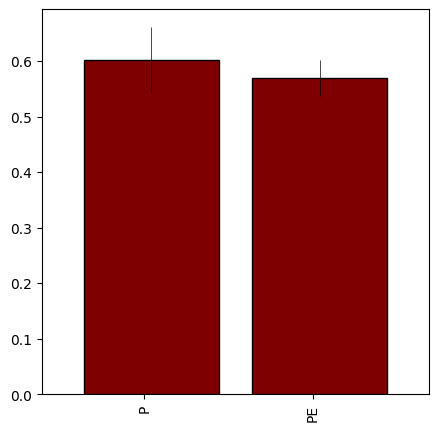

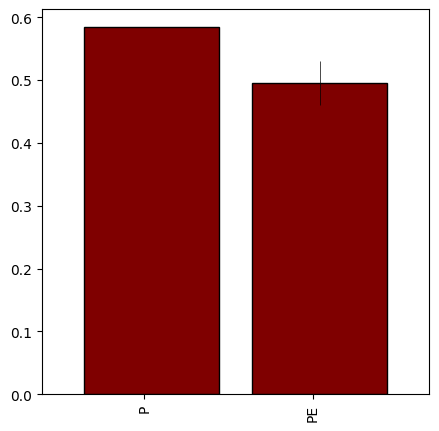

In [10]:
# create summary plots if running multiple reps
if reps>1:

    summ_metrics = get_dedup_pep_df(all_metrics)
    summ_metrics.to_csv(os.path.join(outdir,'summary_metrics.tsv'),sep='\t',index=False)

    TrainingEvaluation.save_feature_comparison_plots(summ_metrics, "mean_prauc", "std_prauc", outdir, "prauc_barplot.png")
    TrainingEvaluation.save_feature_comparison_plots(summ_metrics, "mean_ppv", "std_ppv", outdir, "ppv_barplot.png")